<a href="https://colab.research.google.com/github/aliroish/Data-Analyst-using-python/blob/main/C7W4_Expaloratory_Data_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline


In [ ]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df=pd.read_csv(file_path)
df.head()


**Linear Regression and Multiple Linear Regression**

In [8]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()
lm

**How could "highway-mpg" help us predict car price?**

In [15]:
x = df[['highway-mpg']]
y = df['price']

In [ ]:
df[["highway-mpg", "price"]]

In [ ]:
lm.fit(x,y)

the output is

In [22]:
Yhat=lm.predict(x)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

**What is the value of the intercept a**

In [26]:
lm.intercept_

38423.3058581574

**what is the value of the slope b**

In [27]:
lm.coef_

array([-821.73337832])

**What is the final estimated linear model we get?**

price= 38423.3058581574   --821.73337832

Question #1 a):
Create a linear regression object called "lm1"

In [28]:
lm1=LinearRegression()
lm1

LinearRegression()

Question #1 b):
Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [29]:
x = df[['engine-size']]
y = df['price']

In [ ]:
lm1.fit(x,y)

In [ ]:
Yhat=lm1.predict(x)
Yhat[0:5]

In [34]:
#intercept
lm1.intercept_

-7963.338906281042

In [35]:
#Slope
lm1.coef_

array([166.86001569])

price+ -7963.338906281042   166.86001569

**Multiple Linear Regression**

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


$$
a: intercept\\\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$


In [38]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [39]:
lm.fit(z,df['price'])

LinearRegression()

In [40]:
lm.intercept_

-15806.62462632922

In [41]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Question #2 a): ¶
Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [42]:
lm2=LinearRegression()

In [46]:
x = df[['normalized-losses']]
x1=df["highway-mpg"]
y = df['price']

In [ ]:
lm2.fit(x,x1,y)

In [48]:
Yhat=lm2.predict(x)
Yhat[0:5]

array([27.88891803, 27.88891803, 27.88891803, 26.61584009, 26.61584009])

Question #2 b):
Find the coefficient of the model.

In [49]:
#intercept and slope value
lm2.intercept_

31.586906323498578

In [50]:
lm2.coef_

array([-0.03031138])

**Model Evaluation Using Visualization**

In [67]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
!mamba install sklearn=0.20.1-y

/bin/bash: line 1: mamba: command not found


**Regression Plot**

(0.0, 48186.575788624075)

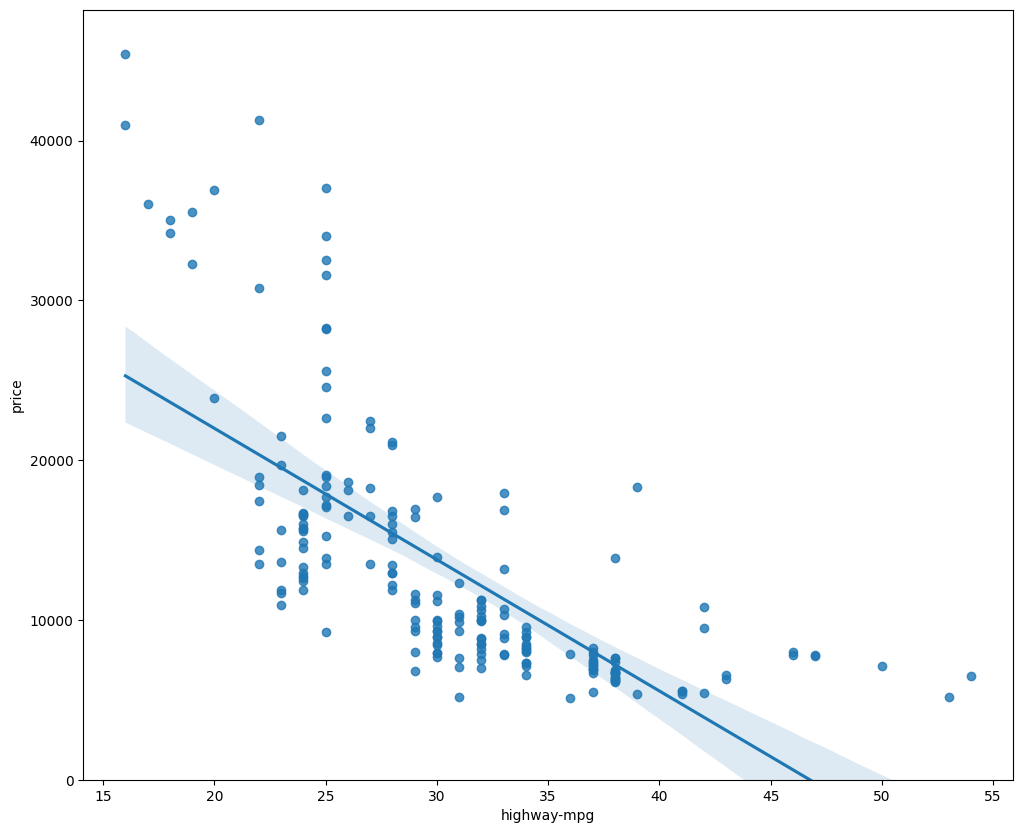

In [69]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Let's compare this plot to the regression plot of peak-rpm

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Question #3:¶
Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [ ]:
df[["peak-rpm","highway-mpg","price"]].corr()

**Residual Plot**

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

In [ ]:
width = 6
height = 3
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

**Multiple Linear Regression**

In [75]:
Y_hat = lm.predict(z)

In [ ]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

**Polynomial Regression and Pipelines**

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2
$$
<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$
<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\
$$


In [77]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [78]:
x = df['highway-mpg']
y = df['price']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [81]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

**Question #4:**
Create 11 order polynomial model with the variables x and y from above.

In [82]:
x = df['highway-mpg']
y = df['price']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 11)

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

In [89]:
Z_pr=pr.fit_transform(z)

In [90]:
z.shape

(201, 4)

In [91]:
Z_pr.shape

(201, 15)

**Pipeline**

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [93]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

In [ ]:
z=z.astype(float)
pipe.fit(z,y)

In [ ]:
ypipe=pipe.predict(z)
ypipe[0:4]

Question #5:¶
Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [99]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(input)
pipe

In [ ]:
z = z.astype(float)
pipe.fit(z,y)

**Measures for In-Sample Evaluation**

R^2 / R-squared
Mean Squared Error (MSE)
R-squared
Mean Squared Error (MSE)

**Model 1: Simple Linear Regression**

In [116]:
x = df[['highway-mpg']]
y = df['price']

In [118]:
#highway_mpg_fit
lm.fit(x,y)
# Find the R^2
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.4965911884339176


In [ ]:
Yhat=lm.predict(x)
print('The output of the first four predicted value is: ', Yhat[0:4])

let import mean_squared_error function

In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


**Model 2: Multiple Linear Regression**

In [123]:
# fit the model
lm.fit(z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Let calculate the MSE

In [124]:
Y_predict_multifit = lm.predict(z)

In [125]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


**Model3:Polynomial Fit**

In [126]:
from sklearn.metrics import r2_score

In [127]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7023769093756598


**MSE**

In [128]:
mean_squared_error(df['price'], p(x))

18703127.63085496

Prediction and Decision Making
Prediction

In [129]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [130]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [131]:
lm.fit(X, Y)
lm

LinearRegression()

In [134]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

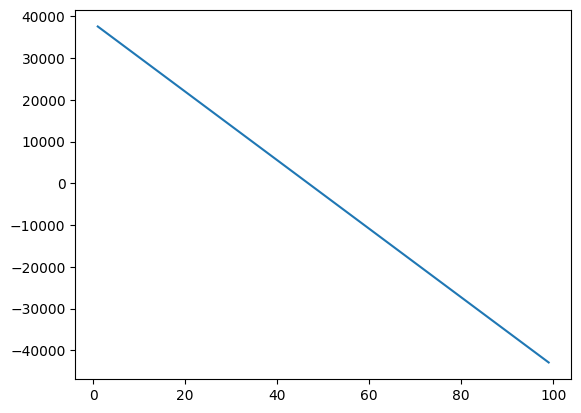

In [133]:
plt.plot(new_input, yhat)
plt.show()

**Decision Making: Determining a Good Model Fit**